# 실습4. 2차 Runge-Kunta Method를 통한 단진동 운동방정식 해결

Prob1. 2차 룬제-쿤타 방법을 이용해 단진동 운동 방정식을 풀고, 결과를 그래프로 그리세요. \\
Equation of motion: $m\dfrac{d^2x}{dt^2} = -kx$, \\
$m=k=1, x_0 = 0, v_0=1, $ $t=0\sim10$초, $dt= 0.01$초.

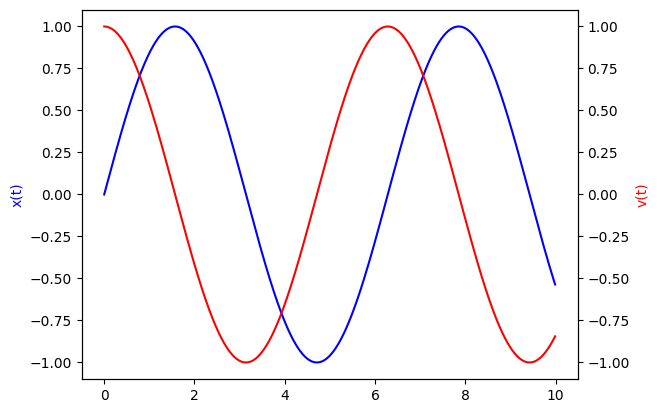

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m=1; k=1;
x0=0; v0=1;
t0=0; maxt=10; dt=0.01
t_arr = np.arange(t0, maxt,dt)

x_arr = []
v_arr = []

def dxdt(v, x):
  return v

def dvdt(v, x):
  global k, m
  return -k*x/m

def RK_2nd(v, x, dt):
  k1 = dt*dxdt(v, x)
  l1 = dt*dvdt(v, x)

  k2 = dt*dxdt(v+0.5*l1, x+0.5*k1)
  l2 = dt*dvdt(v+0.5*l1, x+0.5*k1)

  return v+l2, x+k2

x= x0
v= v0
for t in t_arr:
  x_arr.append(x)
  v_arr.append(v)
  v, x = RK_2nd(v, x, dt)


fig, ax1 = plt.subplots()
ax1.plot(t_arr, x_arr, 'b', label = 'x(t)')
ax1.set_ylabel('x(t)', color = 'b')

ax2 = ax1.twinx()
ax2.plot(t_arr, v_arr, 'r', label = 'v(t)')
ax2.set_ylabel('v(t)', color = 'r')


plt.show()

위의 코드는 2차 룬제-쿤타 방법을 이용해 단진동 운동방정식을 푼 뒤, 그 결과를 그래프로 나타내는 코드이다. 변수 m, k, x0, v0은 문제에서 주어진 대로 선언하였으며, t_arr 리스트에 0~10초 사이를 0.01초 간격으로 나눈 값들을 저장하였다. x_arr와 v_arr는 각각 시간에 따른 위치와 속도 값을 저장하는 리스트이다. 사용자 정의함수 dxdt(v,x)는 속도와 위치값을 입력받은 뒤 속도 $v$를 반환하는 함수이고, 사용자 정의함수 dvdt(v, x)는 속도와 위치값을 입력받아 $-\dfrac{k}{m}x$값을 반환하는 함수이다. \\
사용자 정의함수 RK_2nd(v, x, dt)는 입력받은 v값과 x값에 대해 2차 룬제-쿤타 방법을 적용시키는 함수이다.

```
  k1 = dt*dxdt(v, x)
  l1 = dt*dvdt(v, x)

  k2 = dt*dxdt(v+0.5*l1, x+0.5*k1)
  l2 = dt*dvdt(v+0.5*l1, x+0.5*k1)
```
부분은 2차 룬제-쿤타 방법 공식의 $x(t+dt) = x(t) + f(\bar x)dt$, $\bar x \equiv x(t+\dfrac{dt}{2}) = x(t) + \dfrac{dt}{2} f(x)$을 나타내는 공식으로, 변수 k1과 l1은 위 공식의 $f(x)dt$ 부분을 의미하며, k2와 l2는 위 공식의 $f(\bar x)dt$ 부분을 나타낸다. 이후 최종적으로 v+l2 와 x+k2 값을 반환한다. \\
이후 변수 x와 v를 선언하여 초기값을 각각 x0, v0로 설정한 뒤 For문을 통해 t_arr안의 t값에 따른 x값과 v값을 x_arr와 t_arr에 저장하고 RK_2nd 함수를 통해 2차 룬제-쿤타 방법을 바탕으로 위치와 속도값을 업데이트하도록 반복문을 설정하였다. \\
위의 내용을 바탕으로 x축을 t_arr로 가지고 y축을 x_arr로 가지는 시간-위치 그래프(파란색)와 x축을 t_arr로 가지고 y축을 v_arr로 가지는 시간-속도 그래프(빨간색)를 나타내었다.